## Read data stored in S3 using SageMaker

In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

role = get_execution_role()
bucket='686prj'
data_key = 'train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [3]:
df = pd.read_csv(data_location,nrows=100000)

In [4]:
df.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'],
      dtype='object')

In [5]:
df.dtypes

date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [6]:
df.isnull().sum()

date_time                        0
site_name                        0
posa_continent                   0
user_location_country            0
user_location_region             0
user_location_city               0
orig_destination_distance    36922
user_id                          0
is_mobile                        0
is_package                       0
channel                          0
srch_ci                         71
srch_co                         71
srch_adults_cnt                  0
srch_children_cnt                0
srch_rm_cnt                      0
srch_destination_id              0
srch_destination_type_id         0
is_booking                       0
cnt                              0
hotel_continent                  0
hotel_country                    0
hotel_market                     0
hotel_cluster                    0
dtype: int64

## Exploratory Data Analysis

In [7]:
df.shape

(100000, 24)

In [8]:
df['posa_continent'].value_counts()

3    76874
1    14527
2     7178
4     1070
0      351
Name: posa_continent, dtype: int64

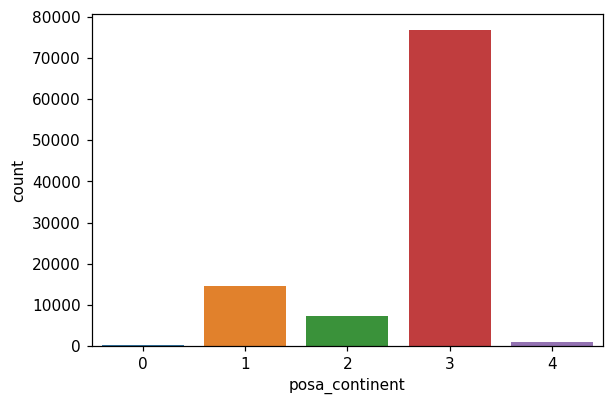

In [9]:
plt.figure(figsize=(6,4),dpi=110)
sns.countplot(x='posa_continent', data=df)
plt.show()

In [10]:
df['user_location_region'].value_counts()

174    12506
220     4322
348     4313
442     4205
354     3077
       ...  
803        1
752        1
559        1
110        1
709        1
Name: user_location_region, Length: 510, dtype: int64

In [11]:
df['is_mobile'].value_counts(normalize=True)

0    0.86197
1    0.13803
Name: is_mobile, dtype: float64

In [12]:
df['is_package'].value_counts(normalize=True)

0    0.73953
1    0.26047
Name: is_package, dtype: float64

In [13]:
df['srch_adults_cnt'].value_counts()

2    66586
1    20167
4     5636
3     5261
5      883
6      828
0      393
8      152
7       64
9       30
Name: srch_adults_cnt, dtype: int64

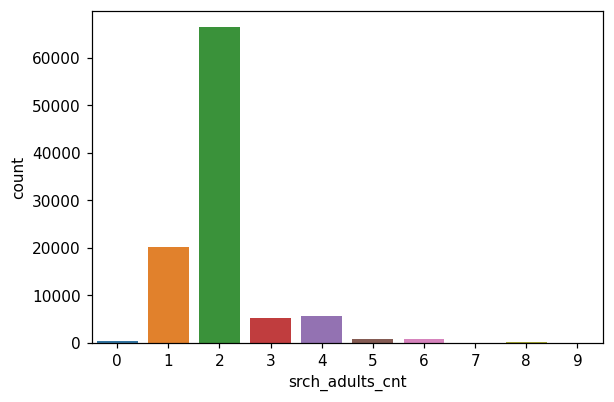

In [14]:
plt.figure(figsize=(6,4),dpi=110)
sns.countplot(x='srch_adults_cnt', data=df)
plt.show()

In [15]:
df['srch_children_cnt'].value_counts()

0    79452
1    10877
2     7980
3     1218
4      404
5       36
6       15
7       10
9        5
8        3
Name: srch_children_cnt, dtype: int64

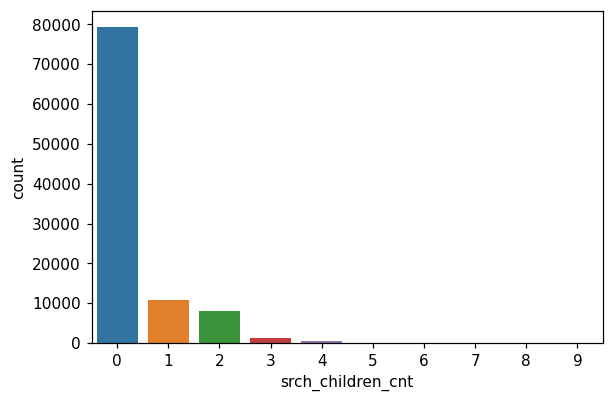

In [16]:
plt.figure(figsize=(6,4),dpi=110)
sns.countplot(x='srch_children_cnt', data=df)
plt.show()

In [17]:
df['srch_rm_cnt'].value_counts()

1    91203
2     7359
3      986
4      182
5      122
8       91
6       39
7       13
0        5
Name: srch_rm_cnt, dtype: int64

<AxesSubplot:xlabel='srch_rm_cnt', ylabel='count'>

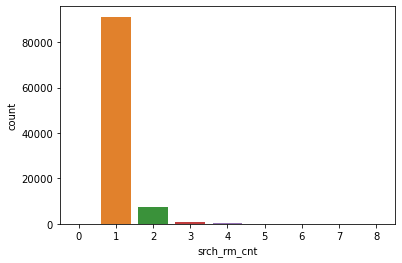

In [18]:
sns.countplot(x='srch_rm_cnt', data=df)

In [19]:
df['srch_destination_type_id'].value_counts()

1    61824
6    22256
3     7037
5     5092
4     3301
8      481
7        5
9        4
Name: srch_destination_type_id, dtype: int64

In [20]:
df['hotel_continent'].value_counts()

2    52859
6    20933
3    12020
4    11908
0     1151
5     1129
Name: hotel_continent, dtype: int64

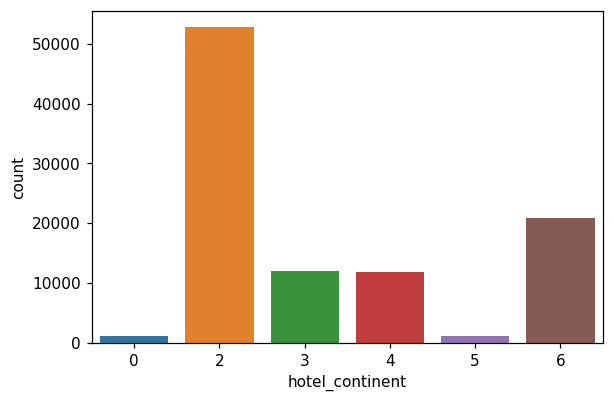

In [21]:
plt.figure(figsize=(6,4),dpi=110)
sns.countplot(x='hotel_continent', data=df)
plt.show()

In [22]:
df['hotel_country'].value_counts()

50     48666
8       5035
198     4193
105     3761
70      3354
       ...  
178        1
3          1
167        1
38         1
120        1
Name: hotel_country, Length: 152, dtype: int64

In [23]:
df['hotel_market'].value_counts()

628     4710
675     3804
682     2483
19      2042
365     1921
        ... 
1760       1
1376       1
992        1
864        1
786        1
Name: hotel_market, Length: 1531, dtype: int64

In [24]:
df['is_booking'].value_counts(normalize=True)

0    0.9173
1    0.0827
Name: is_booking, dtype: float64

## Distribution of the target variable: Whether or not someone booked a hotel

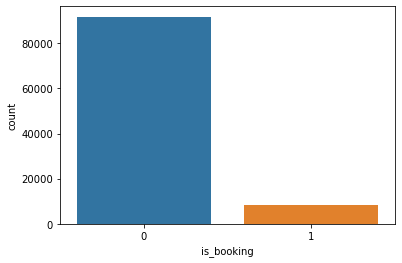

In [25]:
sns.countplot(x='is_booking', data=df)
plt.show()

## Building Predictive Models
Our attempt will be to build predictive models that can predict whether a user books a hotel.  
Here we create a new dataframe with only the features we are interested in.

In [26]:
df = df[['posa_continent','is_mobile','is_package','srch_adults_cnt','srch_children_cnt',
         'srch_rm_cnt','hotel_continent','is_booking']]

In [27]:
df.isnull().sum()

posa_continent       0
is_mobile            0
is_package           0
srch_adults_cnt      0
srch_children_cnt    0
srch_rm_cnt          0
hotel_continent      0
is_booking           0
dtype: int64

## Creating Dummy Variables for Categorical Features

In [28]:
from pandas.core.reshape.reshape import get_dummies

In [29]:
df = pd.get_dummies(df, columns=['posa_continent','is_mobile','is_package','hotel_continent'], drop_first=True)

In [30]:
df

,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,posa_continent_1,posa_continent_2,posa_continent_3,posa_continent_4,is_mobile_1,is_package_1,hotel_continent_2,hotel_continent_3,hotel_continent_4,hotel_continent_5,hotel_continent_6
0,2,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2,0,1,1,0,0,1,0,0,1,1,0,0,0,0
2,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1
99996,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1
99997,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1
99998,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1


## Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('is_booking', axis =1)
y = df["is_booking"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [34]:
X_train.shape

(80000, 14)

In [35]:
X_test.shape

(20000, 14)

## Pre-Processing for Model Building

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [37]:
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

## Model Building, Prediction and Performance

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18323
           1       0.00      0.00      0.00      1677

    accuracy                           0.92     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.84      0.92      0.88     20000



## Imbalanced Class Problem

In [45]:
df['is_booking'].value_counts(normalize=True)

0    0.9173
1    0.0827
Name: is_booking, dtype: float64

In [46]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [47]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [48]:
X_train_res.shape

(146814, 14)

In [49]:
X_train.shape

(80000, 14)

In [50]:
y_train_res.shape

(146814,)

In [51]:
lr1 = LogisticRegression()

In [52]:
lr1.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [53]:
predictions = lr1.predict(X_test)

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.53      0.68     18323
           1       0.11      0.64      0.19      1677

    accuracy                           0.54     20000
   macro avg       0.53      0.58      0.43     20000
weighted avg       0.87      0.54      0.64     20000



In [55]:
#pip install tensorflow

# Deep Neural Network

In [56]:
import tensorflow as tf

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(X_train_res, y_train_res, test_size=0.20, 
                                                      random_state=101,shuffle= True)

In [59]:
model = Sequential()

model.add(Dense(28,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(14,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation = 'sigmoid'))

In [60]:
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=20)

In [61]:
lr_schedule = 1e-3

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss = 'binary_crossentropy')

In [62]:
model.fit(x_train, y_train,epochs = 250,validation_data = (x_valid,y_valid), batch_size=128,
         callbacks = [early_stop])

Epoch 1/250
918/918 [==============================] - 2s 2ms/step - loss: 0.6775 - val_loss: 0.6596
Epoch 2/250
918/918 [==============================] - 2s 2ms/step - loss: 0.6663 - val_loss: 0.6560
Epoch 3/250
918/918 [==============================] - 2s 2ms/step - loss: 0.6633 - val_loss: 0.6556
Epoch 4/250
918/918 [==============================] - 2s 2ms/step - loss: 0.6615 - val_loss: 0.6528
Epoch 5/250
918/918 [==============================] - 1s 2ms/step - loss: 0.6605 - val_loss: 0.6525
Epoch 6/250
918/918 [==============================] - 1s 1ms/step - loss: 0.6599 - val_loss: 0.6523
Epoch 7/250
918/918 [==============================] - 2s 2ms/step - loss: 0.6588 - val_loss: 0.6510
Epoch 8/250
918/918 [==============================] - 1s 1ms/step - loss: 0.6587 - val_loss: 0.6510
Epoch 9/250
918/918 [==============================] - 1s 1ms/step - loss: 0.6581 - val_loss: 0.6509
Epoch 10/250
918/918 [==============================] - 1s 2ms/step - loss: 0.6572 - val_lo

In [63]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

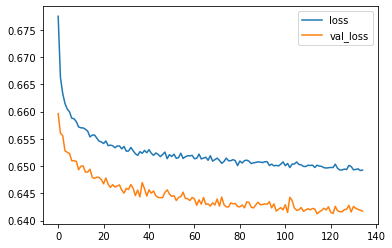

In [64]:
losses.plot()

In [65]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.55      0.69     18323
           1       0.12      0.67      0.20      1677

    accuracy                           0.56     20000
   macro avg       0.53      0.61      0.45     20000
weighted avg       0.88      0.56      0.65     20000

